In [0]:
import numpy as np
import re
import time
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub
from keras.utils import to_categorical
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Embedding, Input
from keras.layers import LSTM, Bidirectional, GlobalMaxPool1D, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, GRU, CuDNNGRU, Conv1D, Lambda
from keras.layers import Bidirectional, GlobalMaxPool1D, Concatenate, Add, Flatten, CuDNNLSTM
from keras import backend as K

from sklearn.model_selection import train_test_split

import os
from google.colab import drive
drive.mount('/content/gdrive')

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() # Needed for TensorFlow Hub

root_path = 'gdrive/My Drive/Colab Notebooks/'

module_url = "https://tfhub.dev/google/universal-sentence-encoder/2"
# Import the Universal Sentence Encoder's TF Hub module
embed = hub.Module(module_url)

# Load the pickle data
train_data=np.load(root_path + "data_train.pkl",allow_pickle=True)
test_data=np.load(root_path + "data_test.pkl",allow_pickle=True)

list_classes = ['anime', 'nfl', 'soccer', 'canada', 'Overwatch', 'leagueoflegends', 'europe', 'worldnews', 'wow', 'Music', 'nba', 'funny', 'movies', 'baseball', 'hockey', 'GlobalOffensive', 'trees', 'gameofthrones', 'conspiracy', 'AskReddit']

# Create the train and test dataframes
train_df = pd.DataFrame({'comment': train_data[0], 'label': train_data[1]})
test_df = pd.DataFrame({'comment': test_data})

# Split the training set to train set and valid set
train_split_df, valid_split_df = train_test_split(train_df, test_size = 0.1, random_state=0)


with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  sess.run(tf.tables_initializer())

  # Encode the train dataframe comments and labels
  print("Processing train dataframe")
  train_X, train_y = train_df['comment'], train_df['label']

  train_y_idx = [list_classes.index(label) for label in train_y]
  train_y_categ = to_categorical(train_y_idx)

  embed_train_X = sess.run(embed(train_X))
  
  # Encode the train split dataframe comments and labels
  print("Processing train split dataframe")
  train_split_X, train_split_y = train_split_df['comment'], train_split_df['label']
  
  train_split_y_idx = [list_classes.index(label) for label in train_split_y]
  train_split_y_categ = to_categorical(train_split_y_idx)

  embed_train_split_X = sess.run(embed(train_split_X))

  # Encode the valid split dataframe comments and labels
  print("Processing valid split dataframe")
  valid_split_X, valid_split_y = valid_split_df['comment'], valid_split_df['label']
  
  valid_split_y_idx = [list_classes.index(label) for label in valid_split_y]
  valid_split_y_categ = to_categorical(valid_split_y_idx)

  embed_valid_split_X = sess.run(embed(valid_split_X))

  # Encode the test dataframe comments
  print("Processing test dataframe")
  test_X = test_df['comment']

  embed_test_X = sess.run(embed(test_X))


Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
Instructions for updating:
non-resource variables are not supported in the long term
Processing train dataframe
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Processing train split dataframe
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Processing valid split dataframe
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Processing test dataframe
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [0]:
# Model definition
from keras.models import Sequential

model = Sequential()
model.add(Dense(128, activation='relu', input_dim=512))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dense(len(list_classes), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())



Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_10 (Dense)             (None, 20)                2580      
Total params: 84,756
Trainable params: 84,756
Non-trainable params: 0
_________________________________________________________________
None


Train on 63000 samples, validate on 7000 samples
Epoch 1/15
63000/63000 [==============================] - 11s 169us/step - loss: 1.4587 - acc: 0.5660 - val_loss: 1.3160 - val_acc: 0.6029
Epoch 2/15
63000/63000 [==============================] - 6s 93us/step - loss: 1.3247 - acc: 0.6012 - val_loss: 1.2942 - val_acc: 0.6087
Epoch 3/15
63000/63000 [==============================] - 6s 93us/step - loss: 1.3021 - acc: 0.6046 - val_loss: 1.2900 - val_acc: 0.6081
Epoch 4/15
63000/63000 [==============================] - 6s 94us/step - loss: 1.2800 - acc: 0.6113 - val_loss: 1.2918 - val_acc: 0.6140
Epoch 5/15
63000/63000 [==============================] - 6s 94us/step - loss: 1.2660 - acc: 0.6140 - val_loss: 1.2937 - val_acc: 0.6119
Epoch 6/15
63000/63000 [==============================] - 6s 92us/step - loss: 1.2534 - acc: 0.6167 - val_loss: 1.2871 - val_acc: 0.6117
Epoch 7/15
63000/63000 [==============================] - 6s 93us/step - loss: 1.2385 - acc: 0.6223 - val_loss: 1.2925 - val_ac

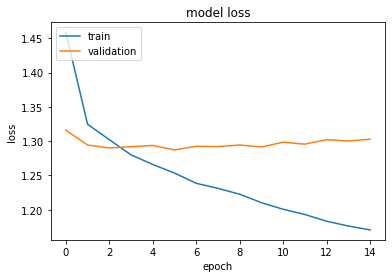

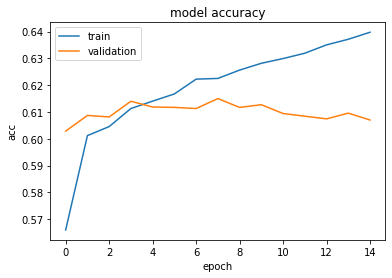

In [0]:
# VALIDATION PHASE

N_EPOCHS = 15
history = model.fit(embed_train_split_X, train_split_y_categ, validation_data = (embed_valid_split_X, valid_split_y_categ), epochs=N_EPOCHS)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [0]:
# TEST PHASE

N_EPOCHS = 4
model.fit(embed_train_X, train_y_categ, epochs=N_EPOCHS)

Epoch 1/4
70000/70000 [==============================] - 6s 91us/step - loss: 1.0439 - acc: 0.6699
Epoch 2/4
70000/70000 [==============================] - 6s 92us/step - loss: 1.0309 - acc: 0.6719
Epoch 3/4
70000/70000 [==============================] - 6s 92us/step - loss: 1.0233 - acc: 0.6763
Epoch 4/4
70000/70000 [==============================] - 6s 91us/step - loss: 1.0168 - acc: 0.6762


In [0]:
predictions = model.predict(embed_test_X)

In [0]:
print(predictions.shape)

(30000, 20)


In [0]:
final_predictions = np.argmax(predictions, axis=1)

In [0]:
print(final_predictions.shape)
print(final_predictions)

(30000,)
[13  6  0 ... 15 17  8]


In [0]:
for i, pred_idx in enumerate(final_predictions):
  print(str(i) + "," + list_classes[pred_idx])

0,baseball
1,europe
2,anime
3,canada
4,trees
5,GlobalOffensive
6,hockey
7,anime
8,Music
9,europe
10,conspiracy
11,gameofthrones
12,GlobalOffensive
13,canada
14,soccer
15,conspiracy
16,Music
17,conspiracy
18,anime
19,nba
20,movies
21,funny
22,hockey
23,baseball
24,wow
25,funny
26,soccer
27,gameofthrones
28,trees
29,funny
30,nba
31,GlobalOffensive
32,nba
33,worldnews
34,gameofthrones
35,gameofthrones
36,baseball
37,Music
38,nba
39,gameofthrones
40,hockey
41,gameofthrones
42,europe
43,funny
44,gameofthrones
45,GlobalOffensive
46,funny
47,funny
48,funny
49,AskReddit
50,leagueoflegends
51,anime
52,worldnews
53,movies
54,Overwatch
55,canada
56,Music
57,conspiracy
58,europe
59,nfl
60,Music
61,nfl
62,anime
63,funny
64,worldnews
65,GlobalOffensive
66,nba
67,funny
68,funny
69,leagueoflegends
70,leagueoflegends
71,worldnews
72,anime
73,Overwatch
74,conspiracy
75,AskReddit
76,europe
77,hockey
78,anime
79,anime
80,europe
81,worldnews
82,leagueoflegends
83,trees
84,canada
85,funny
86,anime
87,soccer